1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

data source: https://data.medicare.gov/Hospital-Compare/Complications-and-Deaths-Hospital/ynj2-r877

# REMEMBER TO EDIT ALL MARKDOWN AND CORRECT TYPOS, SPELLING, ETC!

Data Description The Healthcare-Associated Infection (HAI) measures - provider data. These measures are developed by Centers for Disease Control and Prevention (CDC) and collected through the National Healthcare Safety Network (NHSN). They provide information on infections that occur while the patient is in the hospital. These infections can be related to devices, such as central lines and urinary catheters, or spread from patient to patient after contact with an infected person or surface. Many healthcare associated infections can be prevented when the hospitals use CDC-recommended infection control steps.

Complications, readmissions, and death measures are all risk adjusted. The denominator typically represents the entire population that could have been at risk, the numerator (score) typically represents the rate of patients who had a complication (which may be risk-adjusted), and the higher/lower estimates typically provide a confidence interval for that rate. The lower and higher estimates are the 95th confidence intervals, and are used to define whether the hospital’s rate is better than, worse than, or no different from the national average, and are shown on the graphs that appear in the “show all graphs” view available in a search result on the Hospital Compare site.
 
The lower and higher estimates are the 95th confidence intervals, and are used to define whether the hospital’s rate is better than, worse than, or no different from the national average, and are shown on the graphs that appear in the “show all graphs” view available in a search result on the Hospital Compare site. The Measures of complications, deaths, & unplanned visits  section on Hospital Compare also provides more details about the performance categories for each category.

Proposed questions:

1. Which states have the "best" overall hospitals as defined by lowest combined mortality rates? Rank states in order of overall best to worst.

2. How does each state's hospitals compare on the individual categories of mortality? Are there any categories in which that state ranks above or below the national average?

3. Does the number of hospitals in the state or the geographic location affect the state's overall performance?

Future questions:

    Does the geographical area of the state correlate with the performance of its hospials? Further, does the geographical area of the individual hospital within the state correlate with its performance in respect to the state's performance? (rural vs urban, coastal vs mid-west)

    Does the presence of local medical schools or university affiliation affect the hospitals performance, both state-wide and nation-wide?

    Does the presence of multiple local hospitals affect the hospital's performance?

    Looking at individual hospitals in each state, are there individual hospitals that perform well above or below the average for that state?



Data issues:

    Number of hospitals with data for all 19 categories vs incomplete categories.

    NO EXPLANATION was given for the scale or value of the individual Score or Denominator for each Measure.



###### Import, review, and clean-up data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\medicare_Complications_Deaths_Hospital_copy.csv')

In [170]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different Than the National Rate,292.0,3.2,2.1,4.8,NaN,4/1/2015,3/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.0,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291.0,4.3,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411.0,8.8,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869.0,12.7,10.7,15,NaN,7/1/2015,6/30/2018


In [5]:
df.columns.values

array(['Provider ID', 'Hospital Name', 'Address', 'City', 'State',
       'ZIP Code', 'County Name', 'Phone Number', 'Measure Name',
       'Measure ID', 'Compared to National', 'Denominator', 'Score',
       'Lower Estimate', 'Higher Estimate', 'Footnote',
       'Measure Start Date', 'Measure End Date'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             91889 non-null object
Score                   91889 non-null object
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: int64(2), object(16)
memory usage: 12.6+ MB


In [8]:
df['Score'] = pd.to_numeric(df.Score, errors = 'coerce', downcast = 'float')

In [9]:
df['Denominator'] = pd.to_numeric(df.Denominator, errors = 'coerce', downcast = 'float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             51106 non-null float32
Score                   54316 non-null float32
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: float32(2), int64(2), object(14)
memory usage: 11.9+ MB

In [15]:
#inplace = True necessary to keep the rows that have Score values
df.dropna(subset =['Score'], inplace = True)

In [16]:
df.head(27)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different Than the National Rate,292.0,3.200000,2.1,4.8,NaN,4/1/2015,3/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.000000,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291.0,4.300000,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411.0,8.800000,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869.0,12.700000,10.7,15,NaN,7/1/2015,6/30/2018
5,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for pneumonia patients,MORT_30_PN,No Different Than the National Rate,560.0,17.000000,14.4,20,NaN,7/1/2015,6/30/2018
6,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for stroke patients,MORT_30_STK,No Different Than the National Rate,617.0,14.100000,11.8,16.8,NaN,7/1/2015,6/30/2018
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Postoperative Acute Kidney Injury Requiring Di...,PSI_10_POST_KIDNEY,No Different Than the National Rate,1681.0,0.740000,0,1.73,NaN,7/1/2016,6/30/2018
8,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Postoperative Respiratory Failure Rate,PSI_11_POST_RESP,No Different Than the National Rate,1196.0,8.660000,4.4,12.92,NaN,7/1/2016,6/30/2018
9,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different Than the National Rate,4076.0,4.730000,3.1,6.36,NaN,7/1/2016,6/30/2018


Select the following from 'Measure ID' for comparison: 
MORT_30_AMI, MORT_30_CABG, MORT_30_COPD, MORT_30_HF, MORT_30_PN, MORT_30_STK, PSI_4_SURG_COMP

In [42]:
array = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP']
df_mortality = df.loc[df['Measure ID'].isin(array)]

In [20]:
df_mortality.head(20)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.000000,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291.0,4.300000,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411.0,8.800000,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869.0,12.700000,10.7,15,NaN,7/1/2015,6/30/2018
5,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for pneumonia patients,MORT_30_PN,No Different Than the National Rate,560.0,17.000000,14.4,20,NaN,7/1/2015,6/30/2018
6,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for stroke patients,MORT_30_STK,No Different Than the National Rate,617.0,14.100000,11.8,16.8,NaN,7/1/2015,6/30/2018
14,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Deaths among Patients with Serious Treatable C...,PSI_4_SURG_COMP,No Different Than the National Rate,185.0,163.110001,127.1,199.11,NaN,7/1/2016,6/30/2018
20,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,80.0,14.800000,11.6,18.8,NaN,7/1/2015,6/30/2018
22,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,559.0,10.600000,8.4,13.3,NaN,7/1/2015,6/30/2018
23,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,318.0,14.400000,11.4,17.9,NaN,7/1/2015,6/30/2018


In [21]:
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 1 to 91827
Data columns (total 18 columns):
Provider ID             18955 non-null object
Hospital Name           18955 non-null object
Address                 18955 non-null object
City                    18955 non-null object
State                   18955 non-null object
ZIP Code                18955 non-null int64
County Name             18955 non-null object
Phone Number            18955 non-null int64
Measure Name            18955 non-null object
Measure ID              18955 non-null object
Compared to National    18955 non-null object
Denominator             18955 non-null float32
Score                   18955 non-null float32
Lower Estimate          18955 non-null object
Higher Estimate         18955 non-null object
Footnote                20 non-null object
Measure Start Date      18955 non-null object
Measure End Date        18955 non-null object
dtypes: float32(2), int64(2), object(14)
memory usage: 2.6+ MB


In [27]:
df_mortality.groupby('Measure ID')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure ID,,,,,,,,
MORT_30_AMI,2359.0,12.809790,1.110250,8.800000,12.100000,12.800000,13.500000,17.200001
MORT_30_CABG,1005.0,3.135025,0.855779,1.200000,2.600000,3.000000,3.500000,7.300000
MORT_30_COPD,3538.0,8.535918,1.107677,4.900000,7.800000,8.400000,9.200000,14.300000
MORT_30_HF,3617.0,11.562374,1.717860,5.500000,10.400000,11.500000,12.600000,18.799999
MORT_30_PN,4139.0,15.697646,2.102354,8.100000,14.300000,15.600000,17.000000,25.799999
MORT_30_STK,2511.0,13.840305,1.480812,8.900000,12.800000,13.700000,14.700000,21.400000
PSI_4_SURG_COMP,1786.0,162.931900,19.382231,91.709999,150.045002,162.034996,174.400002,242.869995


In [40]:
#same as above
df_mortality['Score'].groupby(df_mortality['Measure ID']).describe()

,count,mean,std,min,25%,50%,75%,max
Measure ID,,,,,,,,
MORT_30_AMI,2359.0,12.809790,1.110250,8.800000,12.100000,12.800000,13.500000,17.200001
MORT_30_CABG,1005.0,3.135025,0.855779,1.200000,2.600000,3.000000,3.500000,7.300000
MORT_30_COPD,3538.0,8.535918,1.107677,4.900000,7.800000,8.400000,9.200000,14.300000
MORT_30_HF,3617.0,11.562374,1.717860,5.500000,10.400000,11.500000,12.600000,18.799999
MORT_30_PN,4139.0,15.697646,2.102354,8.100000,14.300000,15.600000,17.000000,25.799999
MORT_30_STK,2511.0,13.840305,1.480812,8.900000,12.800000,13.700000,14.700000,21.400000
PSI_4_SURG_COMP,1786.0,162.931900,19.382231,91.709999,150.045002,162.034996,174.400002,242.869995


###### Creating plots to show national mean of Score for each Measure ID.
Method: creating sub-df for each of 7 Measure IDs. 

In [105]:
df_ami = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_AMI'])])

In [72]:
df_ami.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 1 to 91814
Data columns (total 18 columns):
Provider ID             2359 non-null object
Hospital Name           2359 non-null object
Address                 2359 non-null object
City                    2359 non-null object
State                   2359 non-null object
ZIP Code                2359 non-null int64
County Name             2359 non-null object
Phone Number            2359 non-null int64
Measure Name            2359 non-null object
Measure ID              2359 non-null object
Compared to National    2359 non-null object
Denominator             2359 non-null float32
Score                   2359 non-null float32
Lower Estimate          2359 non-null object
Higher Estimate         2359 non-null object
Footnote                3 non-null object
Measure Start Date      2359 non-null object
Measure End Date        2359 non-null object
dtypes: float32(2), int64(2), object(14)
memory usage: 331.7+ KB


In [169]:
df_ami.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.0,11,15.5,NaN,7/1/2015,6/30/2018
20,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,80.0,14.8,11.6,18.8,NaN,7/1/2015,6/30/2018
39,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,2567688400,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,441.0,15.4,12.8,18.3,NaN,7/1/2015,6/30/2018
96,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,170.0,14.8,11.7,18.4,NaN,7/1/2015,6/30/2018
115,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,96.0,15.3,11.8,19.9,NaN,7/1/2015,6/30/2018


In [121]:
df_ami.describe()

,ZIP Code,Phone Number,Denominator,Score
count,2359.000000,2.359000e+03,2359.000000,2359.000000
mean,49054.247986,5.865801e+09,200.939377,12.809790
std,28949.545962,2.380581e+09,177.727188,1.110250
min,682.000000,2.013831e+09,25.000000,8.800000
25%,26050.000000,3.604211e+09,71.000000,12.100000
50%,46011.000000,6.062421e+09,150.000000,12.800000
75%,75457.500000,8.038495e+09,272.500000,13.500000
max,99701.000000,9.898943e+09,1553.000000,17.200001


In [144]:
df_cabg = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_CABG'])])

In [147]:
df_copd = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_COPD'])])

In [149]:
df_hf = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_HF'])])

In [151]:
df_pn = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_PN'])])

In [153]:
df_stk = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_STK'])])

In [157]:
df_comp = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['PSI_4_SURG_COMP'])])

<Figure size 432x288 with 0 Axes>

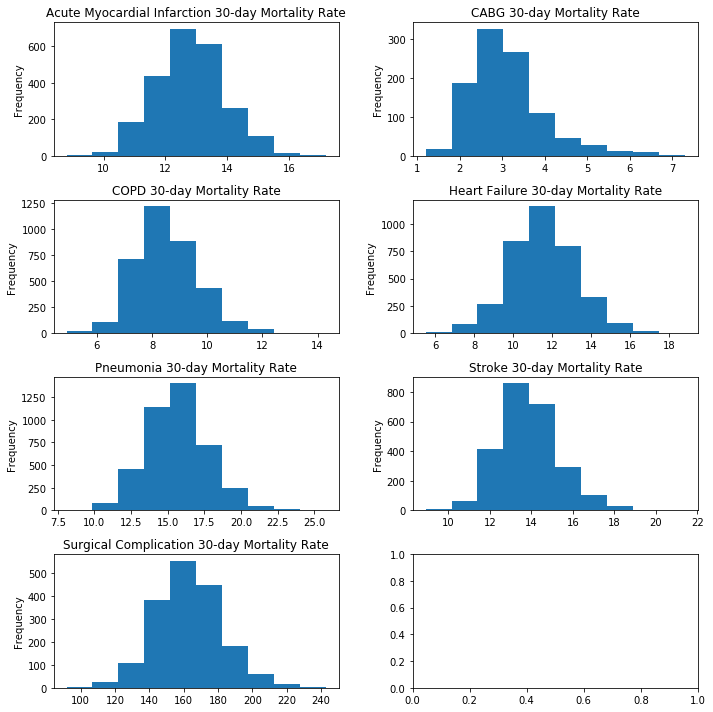

In [162]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))


ax1 = plt.subplot(4, 2, 1)
df_ami.plot(ax  = ax1, kind = 'hist', y = 'Score', title = 'Acute Myocardial Infarction 30-day Mortality Rate', legend = None)

ax2 = plt.subplot(4, 2, 2)
df_cabg.plot(ax  = ax2, kind = 'hist', y = 'Score', title = 'CABG 30-day Mortality Rate', legend = None)

ax3 = plt.subplot(4, 2, 3)
df_copd.plot(ax  = ax3, kind = 'hist', y = 'Score',  title = 'COPD 30-day Mortality Rate', legend = None)

ax4 = plt.subplot(4, 2, 4)
df_hf.plot(ax  = ax4, kind = 'hist', y = 'Score',  title = 'Heart Failure 30-day Mortality Rate', legend = None)

ax5 = plt.subplot(4, 2, 5)
df_pn.plot(ax  = ax5, kind = 'hist', y = 'Score',  title = 'Pneumonia 30-day Mortality Rate', legend = None)

ax6 = plt.subplot(4, 2, 6)
df_stk.plot(ax  = ax6, kind = 'hist', y = 'Score',  title = 'Stroke 30-day Mortality Rate', legend = None)

ax7 = plt.subplot(4, 2, 7)
df_comp.plot(ax  = ax7, kind = 'hist', y = 'Score',  title = 'Surgical Complication 30-day Mortality Rate', legend = None)


plt.tight_layout()
plt.show()

In [139]:
df_ami['Score'].mean()

12.809789657592773

In [163]:
df_cabg['Score'].mean()

3.1350247859954834

In [164]:
df_copd['Score'].mean()

8.535918235778809

In [165]:
df_hf['Score'].mean()

11.562374114990234

In [166]:
df_pn['Score'].mean()

15.697646141052246

In [167]:
df_stk['Score'].mean()

13.84030532836914

In [168]:
df_comp['Score'].mean()

162.93190002441406

In [66]:
#xmin = df_ami['Score'].min()
#xmax = df_ami['Score'].max()
#ymin = df_ami['Denominator'].min()
#ymax = df_ami['Denominator'].max() 


1553.0

###### individual plot for each measure with mean and +/- SD

<Figure size 432x288 with 0 Axes>

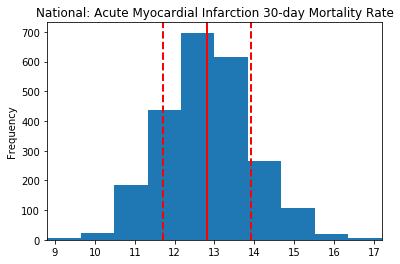

In [201]:
fig = plt.figure()

xmin = df_ami['Score'].min()
xmax = df_ami['Score'].max()

df_ami.plot(kind = 'hist', y = 'Score', legend = None)
plt.xlim(xmin, xmax)

plt.axvline(df_ami['Score'].mean(), color = 'red', linestyle = 'solid', linewidth = 2)

plt.axvline(df_ami['Score'].mean() + df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.axvline(df_ami['Score'].mean() - df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)

plt.title('National: Acute Myocardial Infarction 30-day Mortality Rate')

plt.show()

In [119]:
dfami_state = df_ami.groupby('State')['Score'].describe()
dfami_state

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
AK,5.0,12.360000,1.066771,11.4,11.500,11.90,13.300,13.700000
AL,38.0,13.242107,1.161460,10.6,12.500,13.05,14.200,15.500000
AR,27.0,13.755555,1.237035,11.0,12.900,14.00,14.650,15.900000
AZ,47.0,12.670212,1.164496,10.4,11.900,12.70,13.450,14.900000
CA,211.0,12.613267,1.146387,8.8,11.750,12.60,13.300,16.299999
CO,33.0,12.818183,0.840184,11.4,12.200,12.50,13.200,14.800000
CT,26.0,12.684615,0.984558,10.8,11.900,12.60,13.750,14.200000
DC,8.0,12.575000,0.766719,11.2,12.300,12.55,13.050,13.500000
DE,6.0,12.716667,0.649359,11.6,12.450,12.95,13.150,13.300000


In [203]:
dfami_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, WY to MP
Data columns (total 10 columns):
count    55 non-null float64
mean     55 non-null float64
std      53 non-null float64
min      55 non-null float64
25%      55 non-null float64
50%      55 non-null float64
75%      55 non-null float64
max      55 non-null float64
Rank     55 non-null object
Score    55 non-null float64
dtypes: float64(9), object(1)
memory usage: 7.2+ KB


<Figure size 432x288 with 0 Axes>

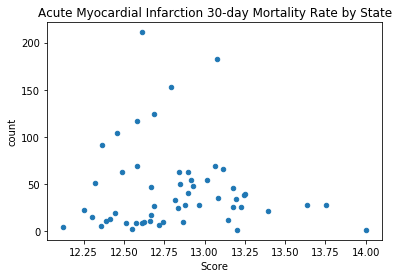

In [188]:
fig = plt.figure()
dfami_state.plot(kind = 'scatter', x = 'Score', y = 'count', legend = None)

plt.title('Acute Myocardial Infarction 30-day Mortality Rate by State')

plt.show()

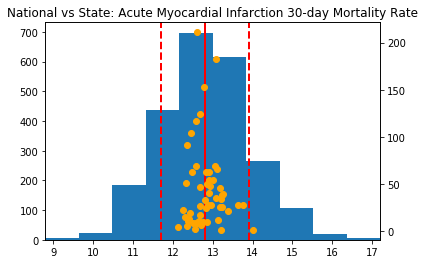

In [202]:
fig, ax1 = plt.subplots()

xmin = df_ami['Score'].min()
xmax = df_ami['Score'].max()

ax1.hist(df_ami["Score"])
plt.xlim(xmin, xmax)
plt.axvline(df_ami['Score'].mean(), color = 'red', linestyle = 'solid', linewidth = 2)
plt.axvline(df_ami['Score'].mean() + df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.axvline(df_ami['Score'].mean() - df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.title('National vs State: Acute Myocardial Infarction 30-day Mortality Rate')
ax2 = ax1.twinx()
ax2.scatter(dfami_state['mean'], dfami_state['count'], color='orange')

###### Rank by state for AMI

In [205]:
dfami_state['Rank'] = dfami_state['mean'].rank()
dfami_state.sort_values('mean', inplace = True)
dfami_state

,count,mean,std,min,25%,50%,75%,max,Rank,Score
State,,,,,,,,,,
WY,4.0,12.125000,1.294540,10.2,12.000,12.65,12.775,13.000000,1.0,12.125000
MN,22.0,12.250000,1.033602,10.7,11.600,12.15,12.550,14.300000,2.0,12.250000
UT,15.0,12.300001,0.968061,11.1,11.550,12.30,12.950,14.000000,3.0,12.300001
MA,51.0,12.319609,0.867876,10.2,11.700,12.50,13.050,13.600000,4.0,12.319609
AK,5.0,12.360000,1.066771,11.4,11.500,11.90,13.300,13.700000,5.0,12.360000
OH,91.0,12.364836,1.086623,9.5,11.650,12.20,12.900,15.100000,6.0,12.364836
ID,10.0,12.390000,1.149348,10.6,12.000,12.30,12.900,14.800000,7.0,12.390000
NM,13.0,12.415385,1.248897,9.9,11.400,12.70,13.200,13.900000,8.0,12.415385
NE,19.0,12.442106,0.635361,11.5,12.100,12.30,12.600,14.200000,9.0,12.442106


<Figure size 432x288 with 0 Axes>

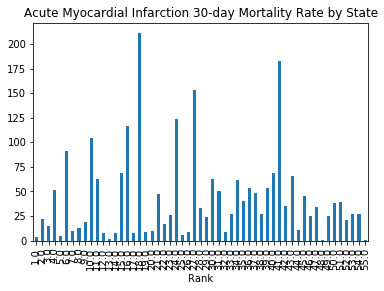

In [218]:
#how do I get it to show the state names below bars?
#is there a way to overlay mean? 
fig = plt.figure()

dfami_state.plot(kind = 'bar', x = 'Rank', y = 'count', legend = None)
plt.xticks
plt.title('Acute Myocardial Infarction 30-day Mortality Rate by State')

plt.show()

state rank by population: http://worldpopulationreview.com/states/#statesTable

https://www.worldatlas.com/articles/us-states-by-population.html


## work in progress

###### For each "Measure ID", plot national distribution of scores; overlay national distrubtion with points for each state. ???

###### Attempts

In [195]:
df_ami.groupby('State')['Score'].agg({'Mean':np.mean, 'SD':np.std})

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Mean,SD
State,,
AK,12.360000,1.066771
AL,13.242105,1.161460
AR,13.755555,1.237035
AZ,12.670213,1.164496
CA,12.613270,1.146387
CO,12.818182,0.840184
CT,12.684615,0.984558
DC,12.575000,0.766718
DE,12.716667,0.649359


In [194]:
fig = plt.figure()
df_ami.groupby('State').mean().plot(kind = 'scatter', x = 'Score', y =  legend = None)

plt.title('Acute Myocardial Infarction 30-day Mortality Rate by State')

plt.show()

ValueError: scatter requires an x and y column

<Figure size 432x288 with 0 Axes>

###### Find mean of each Measure ID by state. 

In [199]:
fig = plt.figure()
df_amistate.plot(kind = 'scatter', x = 'mean', y = 'count', legend = None)

plt.title('Acute Myocardial Infarction 30-day Mortality Rate by State')

plt.show()

KeyError: 'mean'

<Figure size 432x288 with 0 Axes>

###### Attempt to plot 2 different df.plots on one figure

TypeError: unhashable type: 'numpy.ndarray'

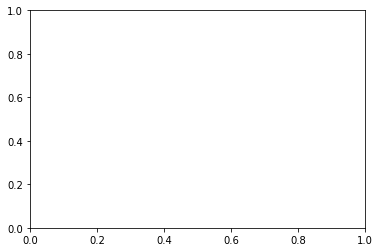

In [191]:
fig, ax1 = plt.subplots()


ax1.plot(df_ami, kind = 'hist', y = 'Score', legend = None)

plt.axvline(df_ami['Score'].mean(), color = 'red', linestyle = 'solid', linewidth = 2)

plt.axvline(df_ami['Score'].mean() + df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.axvline(df_ami['Score'].mean() - df_ami['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)

plt.title('National vs State: Acute Myocardial Infarction 30-day Mortality Rate')

ax2 = ax1.twinx()

ax2.plot(dfami_state, kind = 'scatter', x = 'mean', y = 'count', legend = None)



plt.show()